In [1]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io
#matplotlib.style.use('ggplot')
%matplotlib inline  

In [2]:
bloom = pd.read_csv("~/quantsph/BLOOM.csv")
plc = pd.read_csv("~/quantsph/PLC.csv")
bloom_d = bloom.set_index('Date')
plc_d = plc.set_index('Date')
bloom_d.head()
plc_d.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-02,0.340,0.340,0.340,0.340,1010000
2012-01-03,0.340,0.340,0.340,0.340,1340000
2012-01-04,0.340,0.345,0.340,0.345,1610000
2012-01-05,0.350,0.350,0.345,0.350,1110000
2012-01-06,0.355,0.360,0.355,0.355,3270000


In [3]:
#df = pd.concat({'BLOOM' : bloom_d['Close'], 'PLC' : plc_d['Close']})
df = pd.DataFrame(dict(BLOOM = bloom_d['Close'], PLC = plc_d['Close'])).dropna()
df.index = pd.to_datetime(df.index)
df.tail()

,BLOOM,PLC
2017-09-21,10.82,1.61
2017-09-22,10.50,1.61
2017-09-25,10.32,1.59
2017-09-26,10.80,1.60
2017-09-27,10.42,1.59


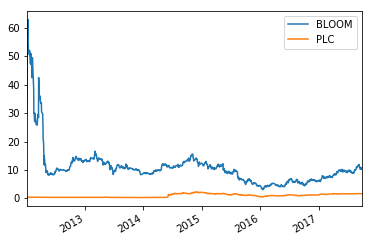

In [4]:
df.plot()

In [5]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [96]:
# create a backtest and run it
test = bt.Backtest(s, df)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

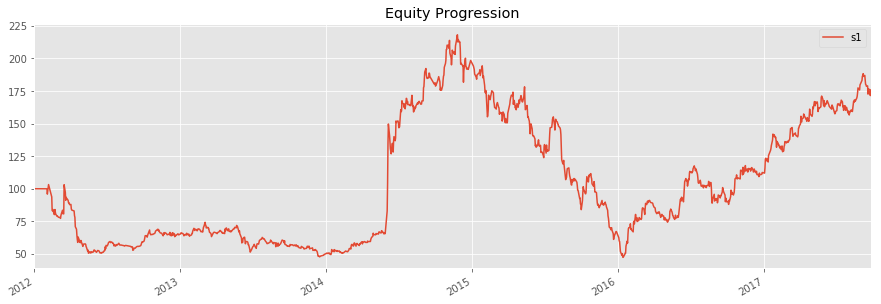

In [97]:
# first let's see an equity curve
res.plot()